## Vectors and the Geometry of Space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
plt.style.use('rose-pine-moon')
%matplotlib inline

### Dot Product

#### Definition

The dot products of vectors $\overrightarrow{u} = \langle u_1, u_2, u_3 \rangle$ and $\overrightarrow{v} = \langle v_1, v_2, v_3 \rangle$ is given by the sum of the productos of the components: <br><br>
$ \overrightarrow{u} \cdot \overrightarrow{v} = u_1v_1 + u_2v_2 + u_3v_3$
<br><br> Dot product of two vectors is a scalar and for this reason it is often called the *scalar product*.

In [2]:
u = np.array([3, 5, 2])
v = np.array([-1, 3, 0])

print(f'analytical: {np.sum(u*v)}\nnp.dot:{np.dot(u, v)}')

analytical: 12
np.dot:12


#### Properties

Let $u$, $v$ and $w$ be vectors and $c$ be a scalar.
1. Commutative: $u\cdot v =v \cdot u$
2. Distributive: $u\cdot(v+w) = u\cdot v + u\cdot w$
3. Associatve: $c (u\cdot v) = (cu)\cdot v = u \cdot(cv)$
4. Magnitude: $v\cdot v = \lVert v \rVert^2$

#### Angle between two vectors

The dot product of two vectors is the product of the magnitude of each vector and the cosine of the angle between them:
$$ 
u \cdot v = \lVert u\rVert \lVert v\rVert \cos\theta \\[1em]
\Rightarrow \cos\theta = \frac{u\cdot v}{\lVert u\rVert \lVert v\rVert}
$$

In [3]:
u = np.array([2, 5, 6])
v = np.array([-2, -4, 4])
theta = np.acos(
    np.dot(u, v) / 
    (np.linalg.norm(u)* np.linalg.norm(v))
)
print(f'theta : {theta / (np.pi)} pi')

theta : 0.5 pi


The nonzero vectors $u$ and $v$ are orthogonal vectors if and only if: <br> <br>
$
u\cdot v=0  \\[1em]
\Rightarrow \lVert u \rVert \lVert v \rVert \cos\theta = 0 \\[1em]
\Rightarrow \theta = \frac{\pi}{2}
$. 

The angle a vector makes with each of the coordinate axes, called a *direction angle*.

In [4]:
v = np.array([2, 3, 3])
direction_angles = np.acos(v @ np.eye(3) / np.linalg.norm(v))
print(f'Direction angles : {direction_angles} radians')

Direction angles : [1.13028566 0.87681573 0.87681573] radians


#### Projections

The vector projection of $v$ onto $u$ is labeled as $proj_u v$. It has the same initial point as u and v, and reperesents component of v that acts in the direction of u. By properties of traingles we can the magnitude of $proj_u v$ is : <br><br>
$\lVert proj_u v \rVert = \lVert v \rVert \cos\theta$ 
Multiplying by a unit vector in the direction of $u$ to get $proj_u v$: <br><br>
$
proj_u v = \lVert v \rVert  \frac{u \cdot v}{\lvert u \rvert  \lVert v \rVert} \frac {u}{ \lVert u \rVert}
= \frac{u\cdot v}{\lVert u \rVert^2} u
$
<br><br>Sometimes it is useful to decompose vectors—that is, to break a vector apart into a sum. This process is called the resolution of a vector into components. Projections allow us to identify two orthogonal vectors having a desired sum

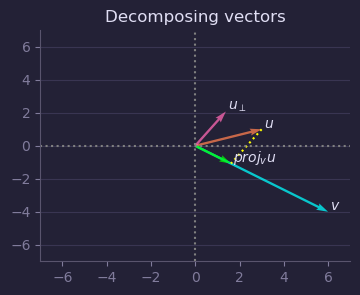

In [5]:
u = np.array([3, 1])
v = np.array([6, -4])
p = np.dot(u,v) / np.linalg.norm(v)**2 * v
q = u - p

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

colors = ['coral', 'cyan', 'lime', 'hotpink']
text = ['$u$', '$v$','$proj_v u$', r'$u_{\perp}$']
for n, i in enumerate((u, v, p, q)):
    ax.quiver(0, 0, i[0], i[1], angles='xy',  scale=1, scale_units='xy', color = colors[n], alpha=0.75)
    ax.text(i[0] + 0.1, i[1] + 0.1, s=text[n])

ax.plot([u[0], p[0]], [u[1], p[1]], ls=':', color='yellow')    
ax.axhline(0, ls = ':', color='grey')
ax.axvline(0, ls = ':', color='grey')
ax.set_title(f'Decomposing vectors')
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7);

### Cross Product

Cross product of two vectors generates a third vector, orthogonal to the first two. Let $\overrightharpoon{u}=\langle u_1,u_2,u_3 \rangle$ and $\overrightharpoon{v}=\langle v_1,v_2,v_3 \rangle$. Cross product is defined as <br><br>
$\overrightharpoon{u} \times \overrightharpoon{v} = \langle u_2v_3 - u_3v_2, -(u_1v_3 - u_3v_1), u_1v_2-u_2v_1 \rangle$

In [6]:
p = np.array([1, 0, 0])
q = np.array([0, 1, 0])
c = np.zeros_like(p)
c[0] = p[1]*q[2] - p[2]*q[1]
c[1] = p[2]*q[0] - p[0]*q[2]
c[2] = p[0]*q[1] - p[1]*q[0]

print(f'Mannualy:{c}\t|\tnp.cross:{np.cross(p, q)}')

Mannualy:[0 0 1]	|	np.cross:[0 0 1]


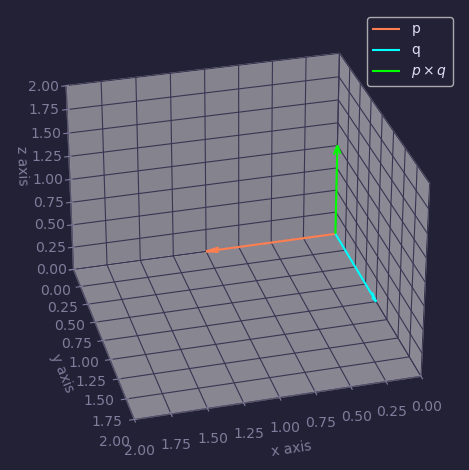

In [7]:
fig, ax = plt.subplots(1, 1, tight_layout = True, subplot_kw=dict(projection='3d'))
labels = ['p', 'q', r'$p\times q$']
for n, i in enumerate((p, q, c)):
    ax.quiver(0, 0, 0, i[0], i[1], i[2], arrow_length_ratio=0.1, color = colors[n], label=labels[n])

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, 2)
ax.view_init(azim=75, elev=30)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.legend();

Cross Product of standard unit vectors 
$\hat{i}\times\hat{i} = \hat{j}\times\hat{j} = \hat{k}\times\hat{k} = \overrightarrow{0}$ . Note that it is not equaivalent to scalar 0 as cross products always gives a vector.

##### Properties

1. Anticommutative : $u \times v = -(v \times u)$
2. Distributive : $u \times(v+w) = u \times v + u \times w$
3. Multiplication by constant: $c (u \times v) = cu \times v = u \times (cv)$
4. Triple Scalar product: $u\cdot(v \times w) = (u \times v)\cdot w$
5. Triple cross product: $u \times (v \times w) = (u\cdot w)v - (u\cdot v)w$

In [8]:
u = np.array([2, 0, 0])
v = np.array([0, 3, 0])
w = np.array([0, 1, 0])

c = np.dot(u, w) * v - np.dot(v, w) * u
print(f'mannually:{c}\t|\tnp.cross : {np.cross(np.cross(u, v), w)}')

mannually:[-6  0  0]	|	np.cross : [-6  0  0]


#### Cross Product

Let $u$ and $v$ be two vectors, and let $\theta$ be the angle between them. Then,<br><br>
$
\lVert u  \times v \rVert = \lVert u \rVert \cdot \lVert v \rVert \cdot \sin \theta
$

#### Determinant

Formula for cross porduct can be difficult to remember. There is an alternative way of commputing dot product using the determinant of matrix as follow:
$$
\begin{vmatrix*}
\hat{i} & \hat{j} & \hat{k} \\
u_1 & u_2 & u_3 \\
v_1 & v_2 & v_3 \\
\end{vmatrix*}
= \hat{i}
\begin{vmatrix*}
u_2 & u_3 \\
v_2 & v_3
\end{vmatrix*}
- \hat{j}
\begin{vmatrix*}
u_1 & u_3 \\
v_1 & v_3
\end{vmatrix*}
+ \hat{k}
\begin{vmatrix*}
u_1 & u_2 \\
v_1 & v_2
\end{vmatrix*}
$$

If vectors u and v form adjacent sides of a parallelogram, then the area of the parallelogram is given by $\lVert u \times v \rVert$ .

The triple scalar product of vectors is the determinant of the 3 × 3 matrix formed by the components of the vectors:
$$
u \cdot (v \times w) = 
\begin{vmatrix*}
u_1 & u_2 & u_3 \\
v_1 & v_2 & v_3 \\
w_1 & w_2 & w_3 
\end{vmatrix*}
$$
- The volume of a parallelepiped with adjacent edges given by vectors u,v, and w is $V=\lvert u(v\times w)\rvert$.
- If the triple scalar product of vectors u,v, and w is zero, then the vectors are coplanar. The converse is also true: If the vectors are coplanar, then their triple scalar product is zero.

### Equations of Lines and Planes in Space

#### Equation of Line

In two dimensions, we can describe a line in space using a point on the line and the direction of the line, or a parallel vector, which we call the **direction vector**.<br> 
Let L be a line in space passing through point $P(x_0,y_0,z_0)$. Let $v = \langle a,b,c \rangle$ be a vector parallel to L. Then, for any point on line Q(x,y,z), we know PQ is parellel to v. Thus we can express PQ as:<br><br>
$
PQ = tv \\[1em]
\Rightarrow \langle x - x_0, y-y_0, z-z_0 \rangle = t \langle a, b, c \rangle \\[1em]
\Rightarrow \langle x, y, z \rangle - \langle x_0, y_0, z_0 \rangle = t\langle a, b, c \rangle \\[1em]
\Rightarrow \langle x, y, z \rangle = \langle x_0, y_0, z_0 \rangle+t\langle a, b, c \rangle 
$ 
<br><br> where t is a scalar. Let $r = \langle x, y, z \rangle$, $r_0 = \langle x_0, y_0, z_0 \rangle$ and $v = \langle a,b,c \rangle$, then the vector equation of a line is :<br><br>
$r = r_0 + t v \\[1em]
\Rightarrow x = x_0 + ta \qquad y = y_0 + tb \qquad z = z_0 + tc
$
<br><br>This form is often referred to as **parametric form**. If we solve for t we get three different equations:
$$\frac{x-x_0}{a} = \frac{y-y_0}{b} = \frac{z-z_0}{c} = t$$
This form is often referred to as **symmetric equation**of the line.

In [9]:
x, y, z, t = sp.symbols('x y z t')
x_0 = sp.Matrix([1,4,-2])
x_1 = sp.Matrix([-3, 5, 0])
v = x_1 - x_0
param_eq = x_0 + sp.matrix_multiply_elementwise(v, sp.Matrix([t, t, t]))
symmetric_eq = sp.matrix_multiply_elementwise(
    sp.Matrix([x,y,z]) - x_0,
    sp.Matrix([1/i for i in v])
    )
print('Parameteric form of equation:')
display(param_eq)
print('Symmetric form of equation:')
display(symmetric_eq)

Parameteric form of equation:


Matrix([
[1 - 4*t],
[  t + 4],
[2*t - 2]])

Symmetric form of equation:


Matrix([
[1/4 - x/4],
[    y - 4],
[  z/2 + 1]])

#### Equation of Line segment

Let $P(x_0,y_0,z_0)$ and $Q(x_1,y_1,z_1)$ be points on a line and let $p = \langle x_0,y_0,z_0 \rangle$ and $q = \langle x_1,y_1,z_1 \rangle $ be associated position ectors, let $r = \langle x,y,z \rangle$. New equation of line becomes:
$$r = p + t(q-p) = (1-t)p + tq$$

#### Distance between a Point and a Line

Let L be a line in space passing through point P with direction vector v. If M is any point not on L, then the distance from M to L is 
$$ d = \frac{\lVert PM \times v \rVert}{\lVert v \rVert} $$

In [10]:
p = np.array([3, -1, 3])
q = np.array([1,1,3])
v = np.array([4,2,1])
print(f'distance between point q and line in direction of v: {np.linalg.norm(np.cross(q-p, v))/np.linalg.norm(v)}')

distance between point q and line in direction of v: 2.690370836538197


In higher dimensions it is possible for two lines to not intersect and at the same time not be parellel. This lines are called **skew lines**.

#### Equations for a Plane

- Given a point P and vector n, the set of all points Q satisfying the equation: $n\cdot PQ=0$ forms a plane. This equation is known as the **vector equation** of a plane.
- The **standard form** of the equation of a plane containing point $P=(x_0,y_0,z_0)$ with normal vector $n = \langle a,b,c\rangle$ is
$$a(x-x_0) + b(y-y_0) + c(z-z_0)=0$$

In [11]:
x, y, z = sp.symbols('x y z')
p = sp.Matrix([1,1,-2])
q = sp.Matrix([0,2,1])
r = sp.Matrix([-1,-1,0])
n = (q-p).cross(r-q)
vector_form = sp.matrix_multiply_elementwise(sp.Matrix([x,y,z]), n)
standard_form = sp.matrix_multiply_elementwise(n, sp.Matrix([x,y,z]) - r)
print(f'vector form')
display(vector_form)
print('standard form')
display(standard_form)

vector form


Matrix([
[ 8*x],
[-4*y],
[ 4*z]])

standard form


Matrix([
[ 8*x + 8],
[-4*y - 4],
[     4*z]])

#### Distance between point and plane

Suppose a plane with normal vector n passes through point Q. The distance d from the plane to a point P not in the plane is given by:
$$d = \lVert proj_n QP \rVert  = \frac{\lvert QP\cdot n \rvert}{\lVert n \rVert}

In [12]:
plane = x - 2*y + z - 5
n = sp.Matrix([1, -2, 1])
p = sp.Matrix([3,1,2])
q = sp.Matrix([sp.solve(plane.subs({y:0, z:0}), x)[0], 0, 0])
n_norm = sp.sqrt(n.dot(n))
d = sp.Mul(sp.Abs((p-q).dot(n)), n_norm**-1)
display(d)

sqrt(6)/3

#### Angles between Planes

Angle $\theta$ between two planes is equal to the angle between the normal vectors $n_1$ and $n_2$. The angle can be found using dot product:
$$\theta = \cos^{-1} (\frac {n_1\cdot n_2}{\lVert n_1 \rVert \lVert n_2 \rVert})$$

#### Distance between two parellel planes

Distance between two planes can be found by selecting a point in one plane and finding its distance from another plane.<br>
Let $P(x_0,y_0,z_0)$ be a point in plane-1 and $Q(x_1,y_1, z_1)$ be a point lie in plane-2 defined by equation $ax + by + cz + k =0$. Than the distance between planes is:
$$
d = \frac {\lvert a(x-x_0) + b(y-y_0) + c(z-z_0) \rvert}{\sqrt{a^2+b^2+c^2}} \\[1em]
= \frac {\lvert ax_0 + by_0 + cz_0 + k \rvert}{\sqrt{a^2+b^2+c^2}}
$$

### Quadric Surfaces

#### Cylinders

A set of lines parallel to a given line passing through a given curve is known as a *cylindrical surface, or cylinder*. The parallel lines are *called rulings*.

In [13]:
def get_cylinder(radius=1, height=1, num_points=100):
    theta = np.linspace(0, 2*np.pi, num_points)
    z = np.linspace(-0.5*height, 0.5*height, num_points)
    theta, z = np.meshgrid(theta, z)

    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.stack((x, y, z), axis=1)

def get_temp_surface(num_points=100):
    x, y = np.meshgrid(np.linspace(0, 5, num_points), np.linspace(0, 5, num_points))
    z  = x**3
    return np.stack((x,y,z), axis=1)

def get_temp_surface_v2(num_points=100):
    x, z = np.meshgrid(np.linspace(0, 4*np.pi, num_points), np.linspace(0, 4*np.pi, num_points))
    y  = np.sin(x)
    return np.stack((x,y,z), axis=1)

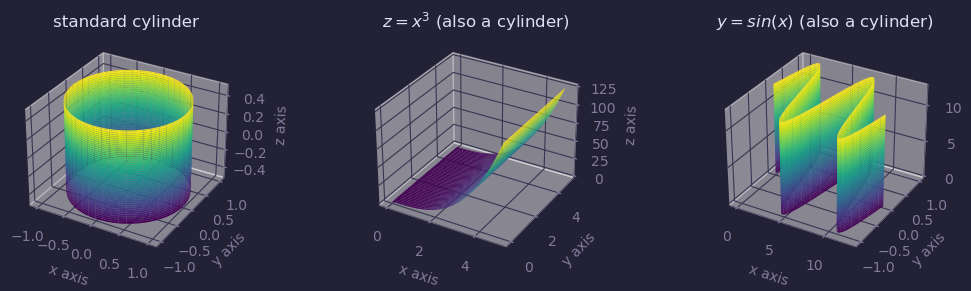

In [14]:
u = get_cylinder()
v = get_temp_surface()
w = get_temp_surface_v2()
fig, axs = plt.subplots(1, 3, figsize=(12,3), tight_layout = True, subplot_kw=dict(projection='3d'))
titles = ['standard cylinder', '$z=x^3$ (also a cylinder)', '$y = sin(x)$ (also a cylinder)']
for n, i in enumerate((u, v, w)):
    axs[n].plot_surface(i[:,0], i[:,1], i[:,2], cmap='viridis')
    axs[n].set_title(titles[n])
    axs[n].set_xlabel('x axis')
    axs[n].set_ylabel('y axis')
    axs[n].set_zlabel('z axis')

#### Traces

The *traces* of a surface are the cross-sections created when the surface intersects a plane parallel to one of the coordinate planes.

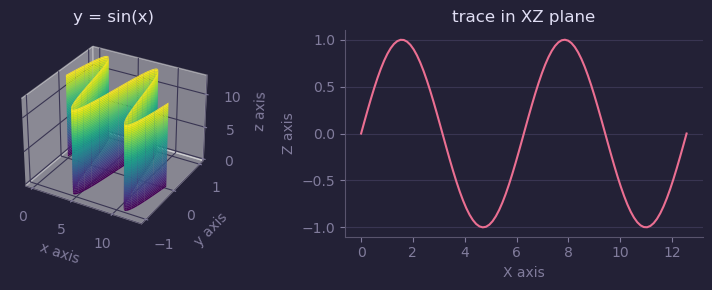

In [15]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surface = ax.plot_surface(w[:,0], w[:,1], w[:,2], cmap='viridis')
ax.set_title('y = sin(x)')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

ax = fig.add_subplot(1, 2, 2)
ax.plot(np.linspace(0, 4*np.pi, 100), np.sin(np.linspace(0, 4*np.pi, 100)))
ax.set_title('trace in XZ plane')
ax.set_xlabel('X axis')
ax.set_ylabel('Z axis')
plt.tight_layout();

#### Quadric Surfaces and conic sections

Quadric surfaces are the graphs of equations that can be expressed in the form:
$$ Ax^2 + By^2 + Cz^2 + Dxy + Exz + Fyz + Gx + Hy + Jz + K = 0 $$
*They have traces that are different kinds of conic sections.*

##### Ellipsoid

An ellipsoid is a surface described by an equation of the form: 
$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1 $$
<br> Parameteric form for plotting:
<br> $x = a \cos(u)\sin(v), y = \sin(u)\sin(v), z = \cos(v)$, where a, b, c are semi-axes and u and v are angles.


<br>`Note` Here parametric forms are used to plot equaitions for better visualizations, the derivations are lengthy and therfore not discussed.

In [16]:
def get_ellipse(a, b):
    theta = np.linspace(0, 2*np.pi, 100)
    return np.stack((a*np.cos(theta), b*np.sin(theta)), 1)

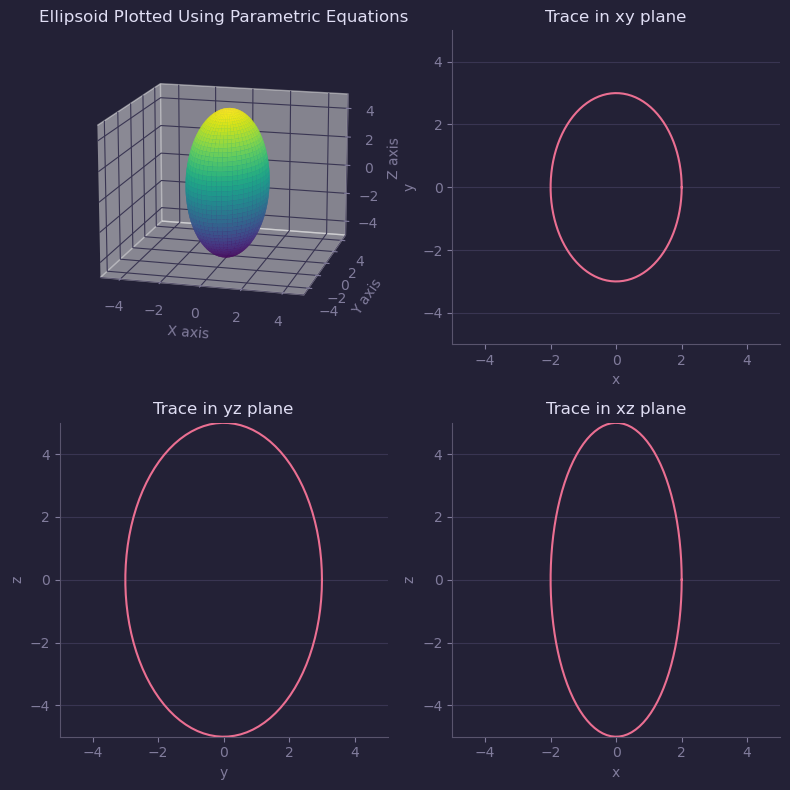

In [17]:
a, b, c = 2, 3, 5
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
u, v = np.meshgrid(u, v)

x = a * np.cos(u) * np.sin(v)
y = b * np.sin(u) * np.sin(v)
z = c * np.cos(v)

trace_xy = get_ellipse(a, b)
trace_yz = get_ellipse(b, c)
trace_xz = get_ellipse(a, c)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(221, projection='3d')
plt.setp(ax, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))
surface = ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(azim=-75, elev=15)

ax.set_title('Ellipsoid Plotted Using Parametric Equations')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

axes = [['x', 'y'], ['y','z'], ['x', 'z']]
for n, i in enumerate((trace_xy, trace_yz, trace_xz)):
    ax = fig.add_subplot(2,2, n+2)
    ax.plot(i[:,0], i[:,1])
    ax.set_xlim(-c, c)
    ax.set_ylim(-c, c)
    ax.set_xlabel(axes[n][0])
    ax.set_ylabel(axes[n][1])
    ax.set_title(f'Trace in {axes[n][0]}{axes[n][1]} plane')
plt.tight_layout();

**Observation**: *Traces*
- In xy - plane : ellipse
- In yz - plane : ellipse
- In xz - plane : ellipse

##### Elliptic paraboloid

A elliptic paraboloid is defined by equation:
$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = \frac{z}{c}$$
The trace in the xy-plane is an ellipse, but the traces in the xz-plane and yz-plane are parabolas. <br>
In polar form: $z= cr^2, x = ar\cos\theta, y = br\sin\theta$

In [18]:
def get_parabola(a, b=0, c=0):
    x = np.linspace(-1, 1, 100)
    y = a*x**2 + b*x + c
    return np.stack((x, y), 1)


def get_hyperbola(a, b):
    x, y = np.meshgrid(np.linspace(-10, 10, 400), np.linspace(-10, 10, 400))
    z = (x/a)**2 - (y/b)**2
    return np.stack((x, y, z), 1)

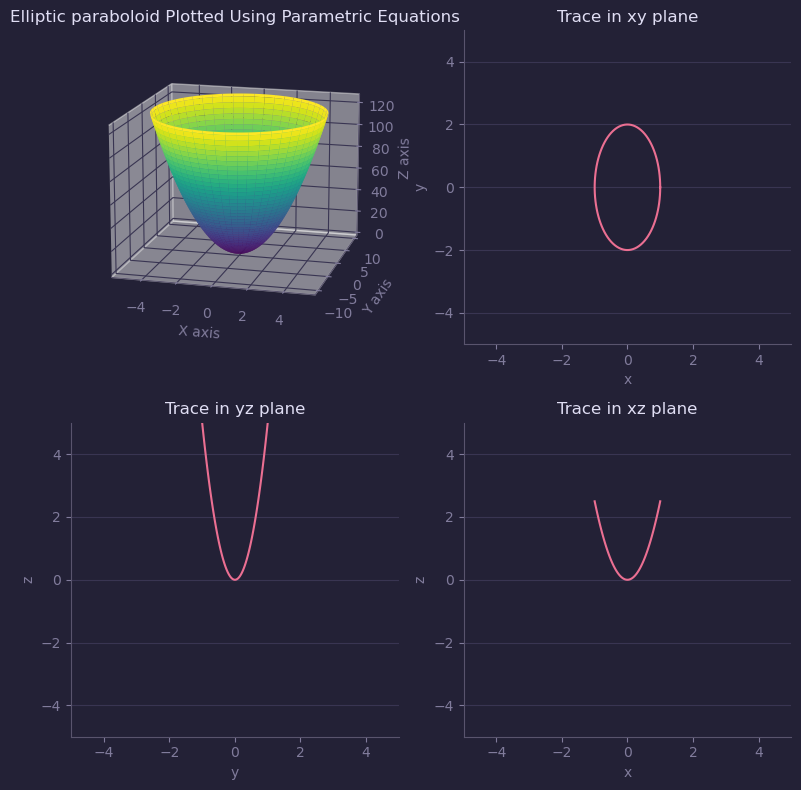

In [19]:
a, b, c = 1, 2, 5

r = np.linspace(0, 5, 100)
theta = np.linspace(0, 2 * np.pi, 100)
r, theta = np.meshgrid(r, theta)

x = a*r*np.cos(theta)
y = b*r*np.sin(theta)
z = c*r**2

# trace in xy : z = k = 5
trace_xy = get_ellipse(a, b)
# trace in yz : x = k = 0
trace_yz = get_parabola(5)
# trace in xz : y = k = 0
trace_xz = get_parabola(5/2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(221, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(azim=-75, elev=15)

ax.set_title('Elliptic paraboloid Plotted Using Parametric Equations')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

axes = [['x', 'y'], ['y','z'], ['x', 'z']]
for n, i in enumerate((trace_xy, trace_yz, trace_xz)):
    ax = fig.add_subplot(2,2, n+2)
    ax.plot(i[:,0], i[:,1])
    ax.set_xlim(-c, c)
    ax.set_ylim(-c, c)
    ax.set_xlabel(axes[n][0])
    ax.set_ylabel(axes[n][1])
    ax.set_title(f'Trace in {axes[n][0]}{axes[n][1]} plane')
plt.tight_layout();

**Observation**: *Traces*
- In xy - plane : ellipse
- In yz - plane : parabola
- In xz - plane : parabola

##### Hyperbolic Paraboloid

Standard equation:
$$ z = \frac{x^2}{a^2} - \frac{y^2}{b^2}$$
Parametric equation:
$$x = ar\cos\theta \qquad y = br\sin\theta \qquad z = cr^2 \cos\theta\sin\theta$$

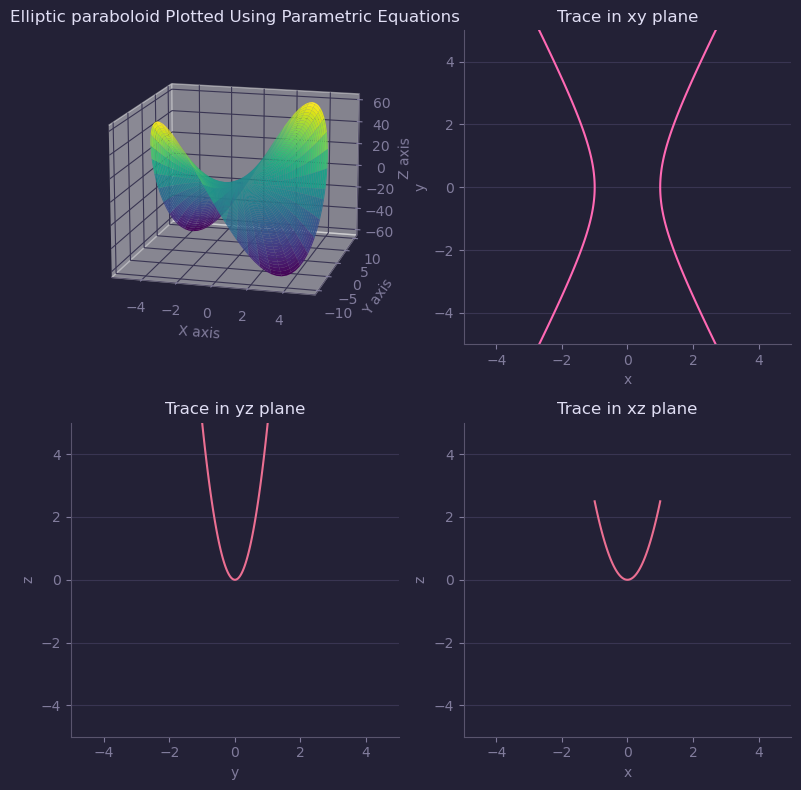

In [20]:
a, b, c = 1, 2, 5

r = np.linspace(0, 5, 100)
theta = np.linspace(0, 2 * np.pi, 100)
r, theta = np.meshgrid(r, theta)

x = a*r*np.cos(theta)
y = b*r*np.sin(theta)
z = c*r**2 * np.cos(theta) * np.sin(theta)

# trace in xy : z = k = 5
trace_xy = get_hyperbola(a, b)
# trace in yz : x = k = 0
trace_yz = get_parabola(5)
# trace in xz : y = k = 0
trace_xz = get_parabola(5/2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(221, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(azim=-75, elev=15)

ax.set_title('Elliptic paraboloid Plotted Using Parametric Equations')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

axes = [['x', 'y'], ['y','z'], ['x', 'z']]
for n, i in enumerate((trace_xy, trace_yz, trace_xz)):
    ax = fig.add_subplot(2,2, n+2)
    if n == 0:
        ax.contour(i[:,0], i[:,1], i[:,2], levels=[1], colors='hotpink', linestyles='-')
    else:
        ax.plot(i[:,0], i[:,1])
    ax.set_xlim(-c, c)
    ax.set_ylim(-c, c)
    ax.set_xlabel(axes[n][0])
    ax.set_ylabel(axes[n][1])
    ax.set_title(f'Trace in {axes[n][0]}{axes[n][1]} plane')
plt.tight_layout();

**Observation**: *Traces*
- In xy - plane : hyperbola
- In yz - plane : parabola
- In xz - plane : parabola

##### Hyperboloid

Standard equation:
$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} - \frac{z^2}{c^2} = 1 $$
Parametric equation:
$$ x(u, v) = a \cosh(u)\cos(v) \\[1em]
y(u, v) = b \cosh(u)\sin(v) \\[1em]
z(u, v) = c\sinh(u)
$$
where 
- *u* ranges over all real numbers $(-\infty, \infty)$.
- *v* ranges from 0 to $2\pi$.

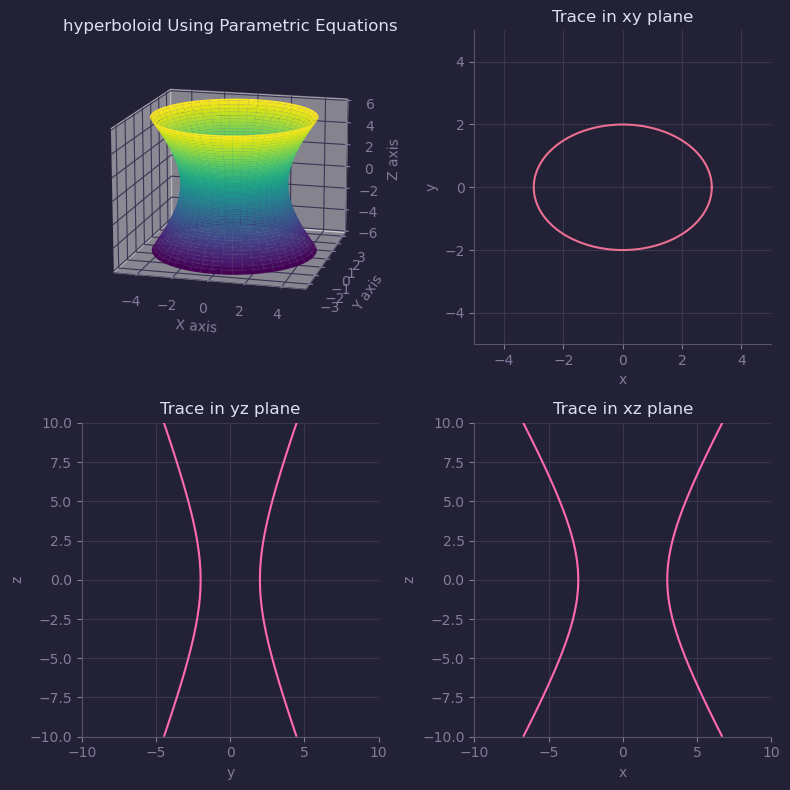

In [21]:
a, b, c = 3, 2, 5
u = np.linspace(-1, 1, 100)
v = np.linspace(0, 2*np.pi, 100)
u, v = np.meshgrid(u, v)

x = a * np.cosh(u) * np.cos(v)
y = b * np.cosh(u) * np.sin(v)
z = c * np.sinh(u)

trace_xy = get_ellipse(a, b)
trace_yz = get_hyperbola(b, c)
trace_xz = get_hyperbola(a, c)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(221, projection='3d')
#plt.setp(ax, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))
surface = ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(azim=-75, elev=15)

ax.set_title('hyperboloid Using Parametric Equations')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

axes = [['x', 'y'], ['y','z'], ['x', 'z']]
for n, i in enumerate((trace_xy, trace_yz, trace_xz)):
    ax = fig.add_subplot(2,2, n+2)
    if n == 0:
        ax.plot(i[:,0], i[:,1])
        ax.set_xlim(-c, c)
        ax.set_ylim(-c, c)
    else: 
        ax.contour(i[:,0], i[:,1], i[:,2], levels=[1], colors='hotpink', linestyles='-')
    ax.set_xlabel(axes[n][0])
    ax.set_ylabel(axes[n][1])
    ax.set_title(f'Trace in {axes[n][0]}{axes[n][1]} plane')
    ax.grid(True)
plt.tight_layout();

**Observation**: *Traces*
- In xy - plane : ellipse
- In yz - plane : hyperbola
- In xz - plane : hyperbola

##### Hyperboloid in two sheets

Standard equation:
$$ -\frac{x^2}{a^2} - \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1 $$
Parametric equation:
$$ x(u, v) = a \sinh(u)\cos(v) \\[1em]
y(u, v) = b \sinh(u)\sin(v) \\[1em]
z(u, v) = c\cosh(u)
$$
where 
- *u* ranges over all real numbers $(-\infty, \infty)$.
- *v* ranges from 0 to $2\pi$.

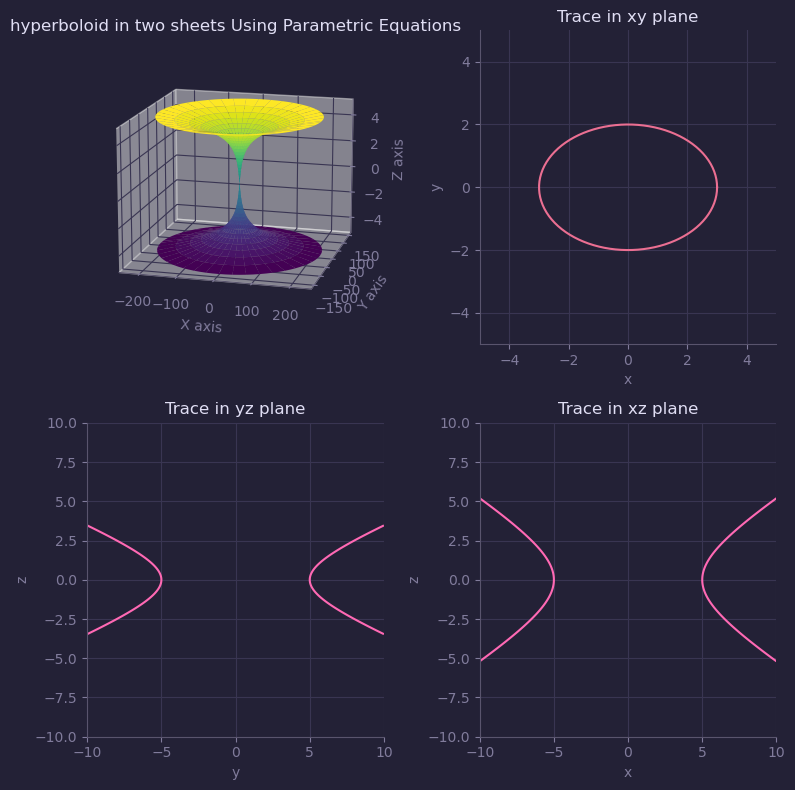

In [22]:
a, b, c = 3, 2, 5
u = np.linspace(-5, 5, 40)
v = np.linspace(0, 2 * np.pi, 80)
u, v = np.meshgrid(u, v)

x = a * np.sinh(u) * np.cos(v)
y = b * np.sinh(u) * np.sin(v)
z =  u

trace_xy = get_ellipse(a, b)
trace_yz = get_hyperbola(c, b)
trace_xz = get_hyperbola(c, a)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(221, projection='3d')
#plt.setp(ax, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))
surface = ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(azim=-75, elev=15)

ax.set_title('hyperboloid in two sheets Using Parametric Equations')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

axes = [['x', 'y'], ['y','z'], ['x', 'z']]
for n, i in enumerate((trace_xy, trace_yz, trace_xz)):
    ax = fig.add_subplot(2,2, n+2)
    if n == 0:
        ax.plot(i[:,0], i[:,1])
        ax.set_xlim(-c, c)
        ax.set_ylim(-c, c)
    else: 
        ax.contour(i[:,0], i[:,1], i[:,2], levels=[1], colors='hotpink', linestyles='-')

    ax.set_xlabel(axes[n][0])
    ax.set_ylabel(axes[n][1])
    ax.set_title(f'Trace in {axes[n][0]}{axes[n][1]} plane')
    ax.grid(True)
plt.tight_layout();

**Observation**: *Traces*
- In xy - plane : ellipse or the empty set (no trace)
- In yz - plane : hyperbola
- In xz - plane : hyperbola

### Cylindrical and Spherical Coordinates 

#### Cylindical Coordinates

In cylindrical coordinate system, a point is represented by ordered triple $(r,\theta,z)$, where:
- $(r,\theta)$ are the polar coordinates of the point's projection in the xy-plane
- z is the usual z-coordinate in the Cartesian coordinate system

<br>The rectangular coordinates $(x,y,z)$ and the cylindrical coordinates $(r,\theta,z)$ of a point are related as follows:<br>
- **cylindrical coordinates -> rectangular coordinates.**
$$ x = r\cos\theta \qquad y = r\sin\theta \qquad z = z$$
- **rectangular coordinates -> cylindrical coordinates:**
$$ r^2 = x^2 + y^2 \qquad \tan\theta = \frac{y}{x} \qquad z = z$$

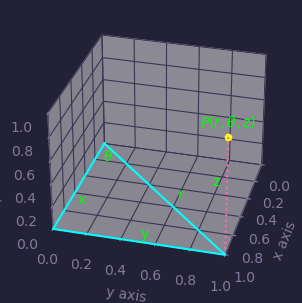

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(4,3), tight_layout = True, subplot_kw=dict(projection='3d'))
ax.plot([1,1], [1, 1], [0,1], ls=':', color='hotpink')
ax.plot([0,1,1, 0],[0,0,1, 0], [0,0,0, 0], color='cyan')
ax.scatter(1, 1, 1, color='yellow')

ax.text(0.2, 0.05, 0, r'$\theta$', color='lime')
ax.text(0.7, 0.05, 0, 'x', color='lime')
ax.text(0.95, 0.5, 0, 'y', color='lime')
ax.text(0.5, 0.6, 0, 'r', color='lime')
ax.text(0.9, 0.9, 0.5, 'z', color='lime')
ax.text(0.8, 0.8, 0.9, r'$P(r,\theta,z)$', color='lime')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.view_init(azim=15, elev=30)
plt.tight_layout()

In [24]:
u = np.array([1, -3, 5])
r = (u[0]**2 + u[1]**2)**0.5
theta = np.arctan2(u[1], u[0])
print(f'cartesian coordinates: {u}\n'
      f'\ncylindrical coordinates:{np.array([r, theta, u[2]])}')

cartesian coordinates: [ 1 -3  5]

cylindrical coordinates:[ 3.16227766 -1.24904577  5.        ]


In [25]:
u = get_cylinder()
x, z = np.meshgrid(np.linspace(0, 1, 10), np.linspace(-1, 1, 10))
y = np.zeros_like(x)
v = np.stack((x, y, z), 1)

x, y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
z = np.ones_like(x)
w = np.stack((x, y, z), 1)

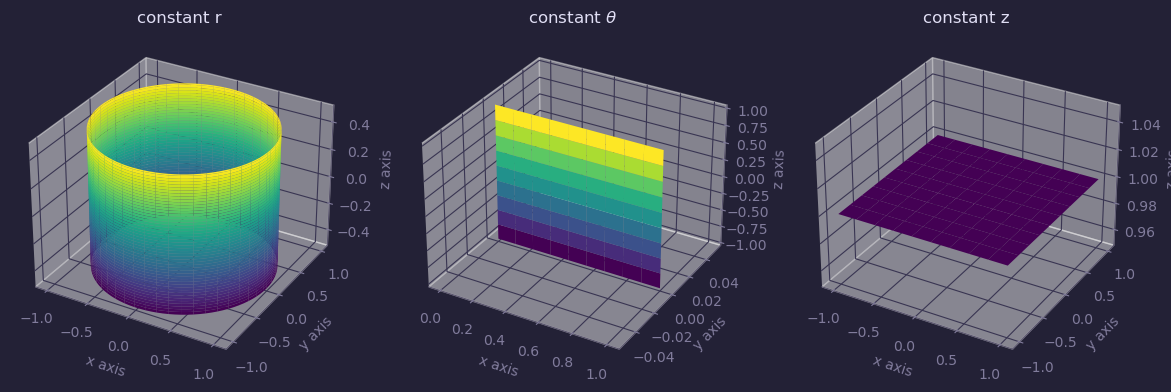

In [26]:

fig, axs = plt.subplots(1, 3, figsize=(12,4), tight_layout = True, subplot_kw=dict(projection='3d'))

titles = ['constant r', r'constant $\theta$', 'constant z']
for n, i in enumerate((u, v, w)):
    axs[n].plot_surface(i[:,0], i[:,1], i[:,2], cmap='viridis')
    axs[n].set_title(titles[n])
    axs[n].set_xlabel('x axis')
    axs[n].set_ylabel('y axis')
    axs[n].set_zlabel('z axis')

In cylindrical coordinates keeping **one parameter constant**, we observe following:
1. Surfaces of the form $r=c$ are vertical cylinders of radius r.
2. Surfaces of the form $\theta=c$ are half-planes at angle $\theta$ from the x-axis(it is easy to come to this conclusion by imagining that rotating this plane from 0 to 360 degrees will give cylinder).
3. Surfaces of the form $z=c$ are planes parallel to the xy-plane (as discussed earlier cylinder is a set of lines parallel to a given line passing through a given curve and therefore the span is complete xy plane).

#### Spherical Coordinates

Rectangular coordinates $(x,y,z)$, cylindrical coordinates $(r,\theta,z)$ and spherical coordinates $(\rho,\theta,\phi)$ of a point are related as follows:
- **spherical coordinates -> rectangular coordinates:**
$$ x = \rho\sin\phi\cos\theta \qquad y = \rho\sin\phi\sin\theta \qquad z = \rho\cos\phi$$
- **rectangular coordinates -> spherical coordinates:**
$$ \rho^2 = x^2+y^2+z^2 \qquad \tan\theta=\frac{y}{x} \qquad \phi = \arccos (\frac{z}{\sqrt{x^2+y^2+z^2}})$$
- **spherical coordinates -> cylindrical coordinates:**
$$ r = \rho\sin\phi \qquad \theta=\theta \qquad z = \rho\cos\phi$$
- **cylindrical coordinates -> spherical coordinates:**
$$ \phi = \sqrt{r^2+z^2} \qquad \theta=\theta \qquad \phi = \arccos(\frac{z}{\sqrt{r^2 + z^2}}) $$

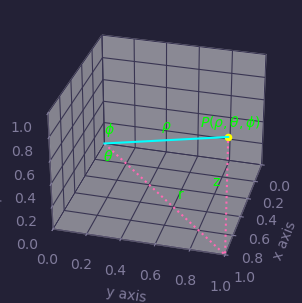

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4,3), tight_layout = True, subplot_kw=dict(projection='3d'))
ax.plot([0, 1,1], [0, 1, 1], [0,0,1], ls=':', color='hotpink')
ax.plot([0,1],[0,1], [0,1], color='cyan')
ax.scatter(1, 1, 1, color='yellow')

ax.text(0.2, 0.05, 0, r'$\theta$', color='lime')
ax.text(0.5, 0.5, 0.6, r'$\rho$', color='lime')
ax.text(0, 0, 0.1, r'$\phi$', color='lime')
ax.text(0.5, 0.6, 0, 'r', color='lime')
ax.text(0.9, 0.9, 0.5, 'z', color='lime')
ax.text(0.8, 0.8, 0.9, r'$P(\rho,\theta,\phi)$', color='lime')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.view_init(azim=15, elev=30)
plt.tight_layout()

In [28]:
u = np.array([1, -3, 5])
r = u[0]**2 + u[1]**2 + u[2]**2
theta1 = np.arctan2(u[1],u[0])
theta2 = np.arccos(u[2] / (r**0.5))
print(
    f'Point U in:'
    f'\n\nCartesian cordinates: {u}',
    f'\n\nCylindrical coordinates: {np.array([r, theta, u[2]])}',
    f'\n\nSphereical coorditinates : {np.array([r, theta1, theta2])}'
    )

Point U in:

Cartesian cordinates: [ 1 -3  5] 

Cylindrical coordinates: [35.         -1.24904577  5.        ] 

Sphereical coorditinates : [35.         -1.24904577  0.56394264]


In [29]:
r = 1
theta = np.linspace(-2*np.pi, 2*np.pi, 100)
phi = np.linspace(0, np.pi, 50)
theta, phi = np.meshgrid(theta, phi)
x = r * np.sin(phi)*np.cos(theta)
y = r * np.sin(phi)*np.sin(theta)
z = r* np.cos(phi)
u = np.stack([x, y , z], 1)

z =  np.linspace(0, 10, 50) 
z = np.sort(z)[::-1] 

theta, z = np.meshgrid(theta, z)
x = -z*np.cos(theta)
y = -z*np.sin(theta)
w = np.stack([x, y , z], 1)

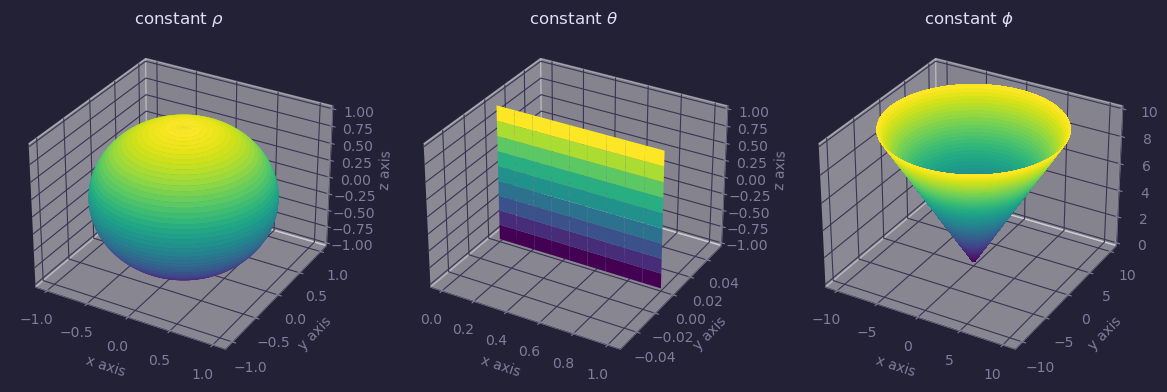

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), tight_layout = True, subplot_kw=dict(projection='3d'))

titles = [r'constant $\rho$', r'constant $\theta$', r'constant $\phi$']
for n, i in enumerate((u, v, w)):
    axs[n].plot_surface(i[:,0], i[:,1], i[:,2], cmap='viridis')
    axs[n].set_title(titles[n])
    axs[n].set_xlabel('x axis')
    axs[n].set_ylabel('y axis')
    axs[n].set_zlabel('z axis')

In Spherical coordinates keeping **one parameter constant**, we observe following:
1. Surfaces of the form $\rho=c$ are sphere of radius $\rho$.
2. Surfaces of the form $\theta=c$ are half-planes at angle $\theta$ from the x-axis.
3. Surfaces of the form $\phi=c$ are half-cones at an angle $\phi$ from z-axis.